In [29]:
#LOADING THE GENDER FILE TEST FILE AND TRAIN FILE

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Specifying Path
x = r"C:\Users\aksha\OneDrive\Desktop\project videos\gender_submission.csv"
w= r"C:\Users\aksha\OneDrive\Desktop\project videos\test.csv"
v= r"C:\Users\aksha\OneDrive\Desktop\project videos\train.csv"

# Load the CSV file
y = pd.read_csv(x)
z= pd.read_csv(w)
u= pd.read_csv(v)

# Check the first few rows to confirm loading
print(y.head())
print(z.head())
print(u.head())



   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
   PassengerId  Survived  P

In [31]:
#INSPECTING THE DATA (SHAPE AND STRUCTURE)
# Inspect the structure and summary of the GENDER file
print("\nInfo of first file (y):")
y.info()

# Inspect the structure and summary of the second file
print("\nInfo of second file (z):")
z.info()

# Inspect the structure and summary of the third file
print("\nInfo of third file (u):")
u.info()

# Check for missing values in each file
print("\n Missing values in first file (y):")
print(y.isnull().sum())

print("\n Missing values in second file (z):")
print(z.isnull().sum())

print("\n Missing values in third file (u):")
print(u.isnull().sum())

# Show the percentage of missing data per column
missing_percentage = y.isnull().sum() / len(y) * 100
print(missing_percentage)

missing_percentage1 = z.isnull().sum() / len(z) * 100
print(missing_percentage1)

missing_percentage2 = u.isnull().sum() / len(u) * 100
print(missing_percentage2)






Info of first file (y):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB

Info of second file (z):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    obje

In [33]:
# Handle missing values for 'Age' by filling with median
z['Age'].fillna(z['Age'].median(), inplace=True)
u['Age'].fillna(u['Age'].median(), inplace=True)

# Fill missing 'Fare' values with the median
z['Fare'].fillna(z['Fare'].median(), inplace=True)

# Handle missing values for 'Embarked' by filling with mode
u['Embarked'].fillna(u['Embarked'].mode()[0], inplace=True)


# Verify that there are no more missing values
print("\nMissing values after cleaning:")
print(z.isnull().sum())
print(u.isnull().sum())


Missing values after cleaning:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\aksha\AppData\Local\Temp\ipykernel_10512\3138857251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['Age'].fillna(z['Age'].median(), inplace=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_10512\3138857251.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [35]:
# Convert 'Sex' and 'Embarked' to categorical variables
z['Sex'] = z['Sex'].astype('category')
z['Embarked'] = z['Embarked'].astype('category')
u['Sex'] = u['Sex'].astype('category')
u['Embarked'] = u['Embarked'].astype('category')

print(y.head())
print(z.head())
print(u.head())


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
   PassengerId  Survived  P

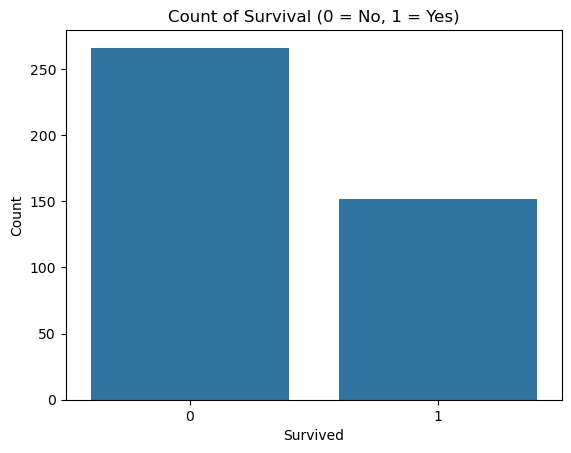

In [37]:
#EDA
#Univariate Analysis

# Survival Count
sns.countplot(x='Survived', data=y ,)
plt.title('Count of Survival (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


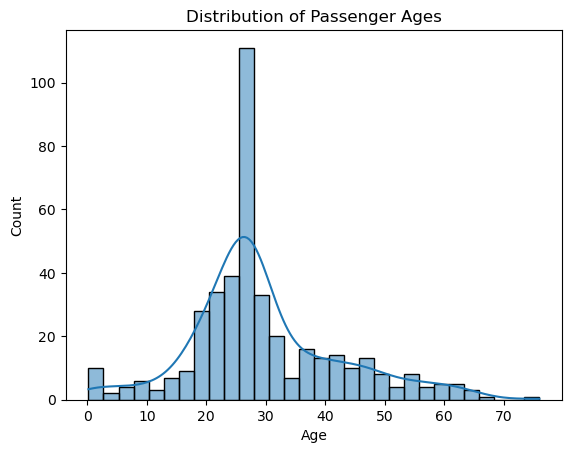

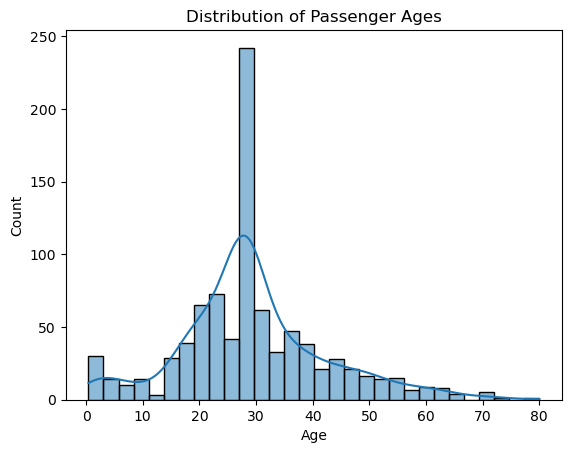

In [39]:
# Distribution of Age for z
sns.histplot(z['Age'], bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Distribution of Age for u
sns.histplot(u['Age'], bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



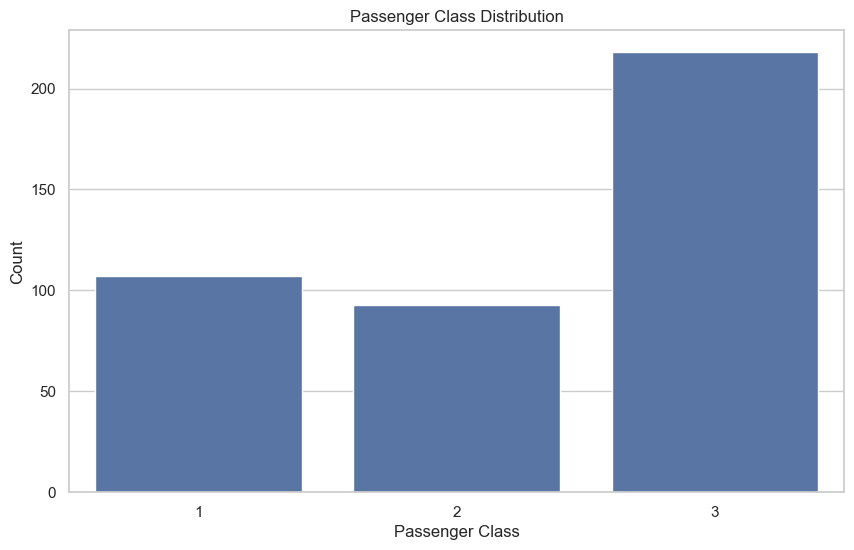

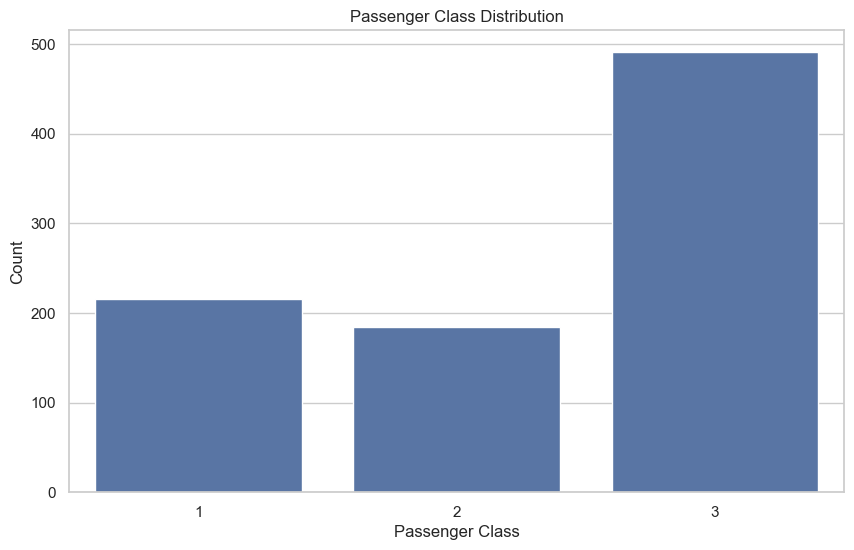

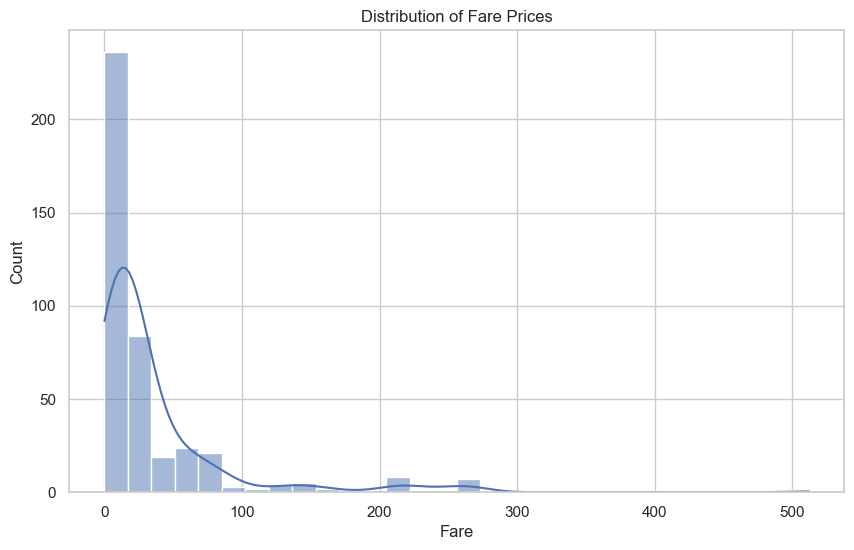

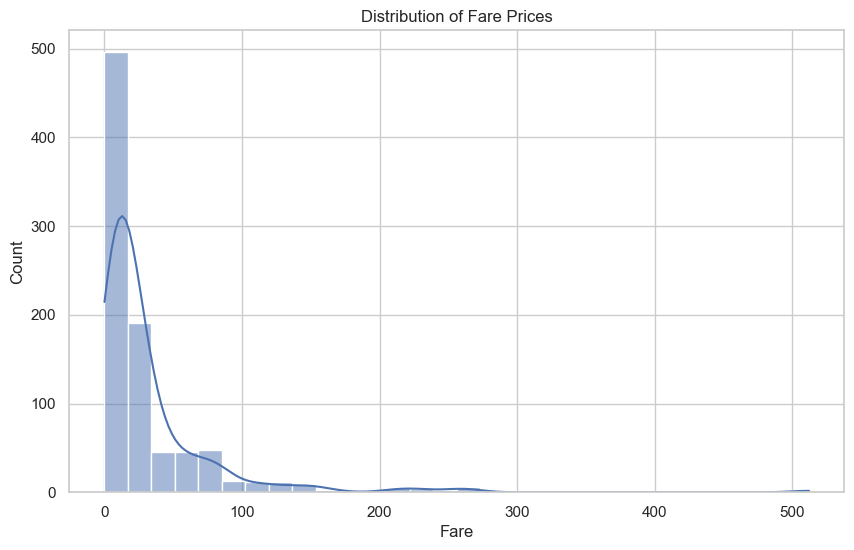

In [230]:
# Passenger Class Distribution
sns.countplot(x='Pclass', data=z)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

sns.countplot(x='Pclass', data=u)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Distribution of Fare
sns.histplot(z['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

sns.histplot(u['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

   PassengerId  Survived  Pclass Name  Sex  Age  SibSp  Parch Ticket  Fare  \
0          892         0     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
1          893         1     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
2          894         0     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
3          895         0     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   
4          896         1     NaN  NaN  NaN  NaN    NaN    NaN    NaN   NaN   

  Cabin Embarked  
0   NaN      NaN  
1   NaN      NaN  
2   NaN      NaN  
3   NaN      NaN  
4   NaN      NaN  


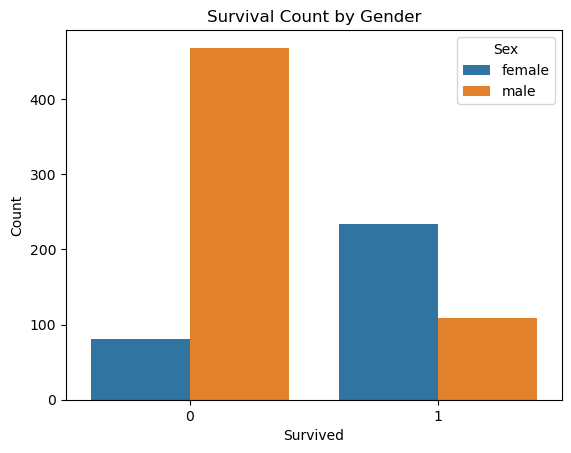

In [41]:
# Concatenate row-wise (stacking datasets on top of each other)
combined_data = pd.concat([y,u], axis=0)

# Concatenate column-wise (side by side)
# combined_data = pd.concat([file1, file2, file3], axis=1)

# Display the combined dataset
print(combined_data.head())

sns.countplot(x='Survived', hue='Sex', data=combined_data)
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


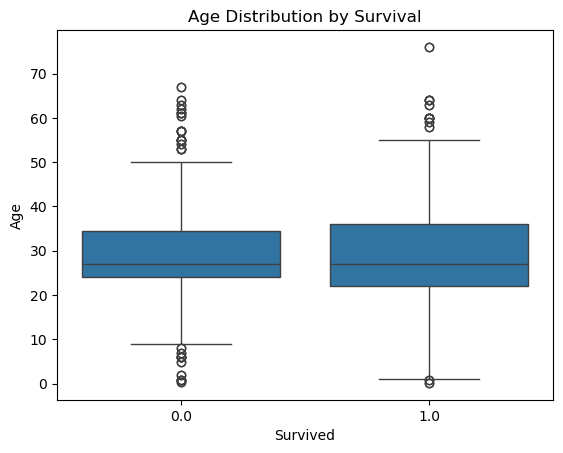

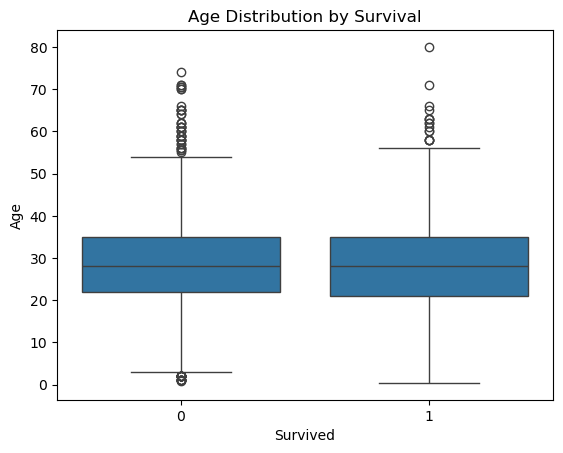

In [57]:
# Age vs. Survival
combined_data = pd.concat([z,y], axis=0)
sns.boxplot(x='Survived', y='Age', data=combined_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

combined_data = pd.concat([u,y], axis=0)
sns.boxplot(x='Survived', y='Age', data=combined_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: category
Categories (2, int64): [1, 0]
   PassengerId  Pclass                                          Name Sex  \
0          892       3                              Kelly, Mr. James   0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)   1   
2          894       2                     Myles, Mr. Thomas Francis   0   
3          895       3                              Wirz, Mr. Albert   0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   1   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0  34.5      0      0   330911   7.8292   NaN        True       False  
1  47.0      1      0   363272   7.0000   NaN       False        True  
2  62.0      0      0   240276   9.6875   NaN        True       False  
3  27.0      0      0   315154   8.6625   NaN       False        True  
4  22.0      1      1  3101298  12.2875   NaN       False        True  
<class 'pandas.core

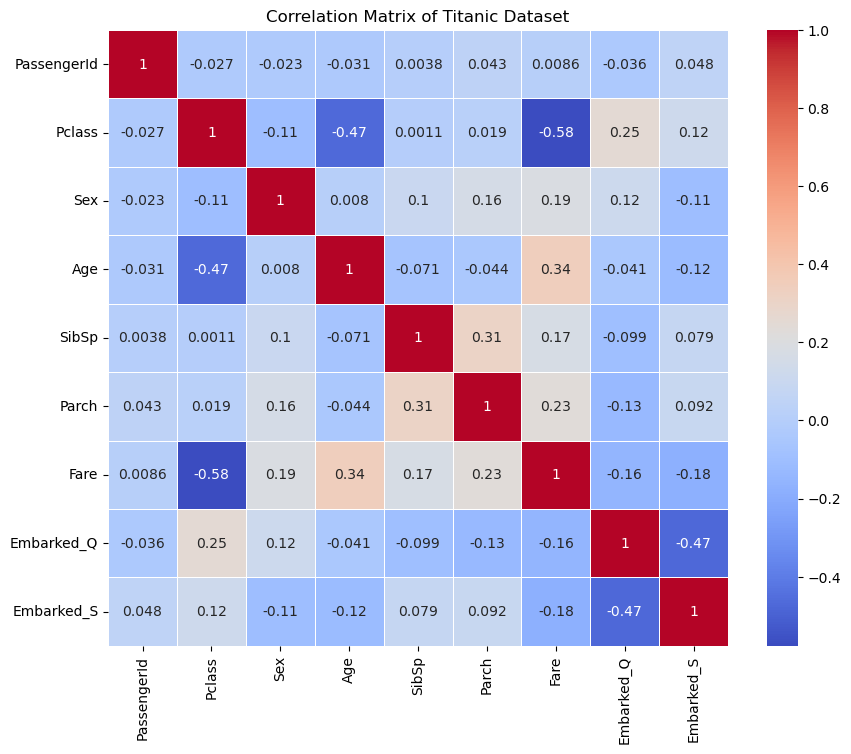

In [73]:
# 2.3 Correlation Analysis

# Convert categorical variables to numerical for correlation
l = z.copy()
l['Sex'] = l['Sex'].map({'male': 0, 'female': 1})
print(l['Sex'].head())
# Convert 'Embarked' to dummy variables (one-hot encoding)
l = pd.get_dummies(l, columns=['Embarked'], drop_first=True)
print(l.head())

# Drop irrelevant columns (non-numeric) like 'Name', 'Ticket', 'Cabin', etc.
data_cleaned = l.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Verify that all remaining columns are numeric
print(data_cleaned.info())

# Drop rows with missing values
data_cleaned = data_cleaned.dropna()
# Perform correlation analysis
correlation_matrix = data_cleaned.corr()

# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()


In [127]:
# Print some observations
print("\nSummary of Findings:")
print("1. Females had a higher survival rate compared to males.")
print("2. Passengers in higher classes (Pclass 1) had better chances of survival.")
print("3. Children (Age <= 12) had a higher survival rate.")
print("4. Passengers who embarked from 'C' (Cherbourg) had a higher survival rate.")
print("5. Smaller families (FamilySize <= 4) had better survival rates.")


Summary of Findings:
1. Females had a higher survival rate compared to males.
2. Passengers in higher classes (Pclass 1) had better chances of survival.
3. Children (Age <= 12) had a higher survival rate.
4. Passengers who embarked from 'C' (Cherbourg) had a higher survival rate.
5. Smaller families (FamilySize <= 4) had better survival rates.
